<a href="https://colab.research.google.com/github/Gauranga2022/Fun-with-Python/blob/main/Simulating_Evolution_The_Game_of_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves.

The game of Life is called "Life" because it's a primitive simulator of evolution. The game's rules can be seen as basic processes of life and death. For example, rule 1 represents "death by under-population", rule 2 represents "sustainable life", rule 3 represents "death by over-population", and rule 4 represents "birth". The game also represents the "checkered journey of life". Players start on the "Infancy" tile and make their way toward "Happy Old Age". Along the way, players can land on squares like "School", "Poverty", and "Bravery". The goal of the game is to collect the most Life Points to win. Each player's Lifestyle card reveals their personality for the game and how many Life points they'll earn for Choice cards.

### Library

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
from IPython.display import HTML
from scipy.stats import bernoulli
from matplotlib.animation import FuncAnimation

### The count function returns (#dead, #alive) of cell[i,j] of its neighbours




In [2]:
def count(grid,i,j):
  dead , alive = 0, 0
  l = [-1,0,1]
  for x in l:
    for y in l:
      if not(x==0 and y==0):
        if grid[i+x, j+y] == 0:
          dead+=1
        else:
          alive+=1
  return((dead,alive))

Test run of the count function

In [ ]:
grid = np.zeros((5,5))
dol = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    grid[i,j] = random.randint(0,1)
print(grid)
print("++++++++++++++++++")
for i in range(1,4):
  for j in range(1,4):
   print("count of cell", [i,j] ,"is", count(grid,i,j))
   print("-------------------------------")

[[1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0.]]
++++++++++++++++++
count of cell [1, 1] is (3, 5)
-------------------------------
count of cell [1, 2] is (2, 6)
-------------------------------
count of cell [1, 3] is (2, 6)
-------------------------------
count of cell [2, 1] is (4, 4)
-------------------------------
count of cell [2, 2] is (3, 5)
-------------------------------
count of cell [2, 3] is (1, 7)
-------------------------------
count of cell [3, 1] is (2, 6)
-------------------------------
count of cell [3, 2] is (2, 6)
-------------------------------
count of cell [3, 3] is (2, 6)
-------------------------------


### The update function for the Game of life for each cell completely inside the grid updates every cell according to these 4 rules of the Game :

1. Any live cell with fewer than two live neighbours dies due to loneliness.
2. Any live cell with two or three live neighbours lives on to the next generation (survival).
3. Any live cell with more than three live neighbours dies, due to competition.
4. Any dead cell with exactly three live neighbours becomes alive (birth).


In [3]:
def update_gol(Grid):
  n = len(Grid[0])
  for i in range(1,n-1):
    for j in range(1,n-1):
      if count(Grid, i, j)[1] < 2 and Grid[i,j] == 1: #Rule 1
        Grid[i,j] = 0
      if (count(Grid, i, j)[1] == 3 or count(Grid, i, j)[1] == 2) and Grid[i,j] == 1: #Rule 2
        Grid[i,j] = 1
      if count(Grid, i, j)[1] > 3 and Grid[i,j] == 1: #Rule 3
        Grid[i,j] = 0
      if count(Grid, i, j)[1] == 3 and Grid[i,j] == 0: #Rule 4
        Grid[i,j] = 1
  return(Grid)

In [ ]:
update_gol(grid)

array([[1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0.]])

## The main function for the Game

1. Dead --> 0 --> Black (A dead cell is represented as 0 colored Black)
2. Alive --> 1 ---> White (A living cell is represented as 1 colored White)

The plot below represents the initialisation of the game.


In [ ]:
grid = np.zeros((50,50))
for i in range(50):
  for j in range(50):
    grid[i,j] = int(np.random.binomial(1, 0.1, 1)) #fill the grid cells with a single sample from bernoulli(p);
print(grid)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(-1.0, 50.0)

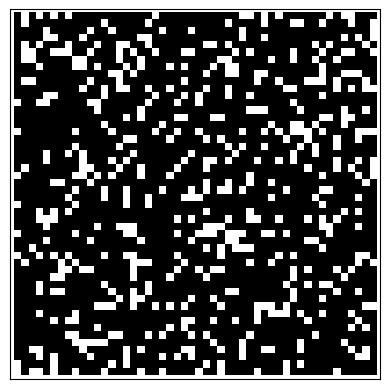

In [ ]:
# Initialize the figure and axis
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='gray')
cb = plt.colorbar(img)
ax.set_xticks([])  # removes the x and y axis values from the plot
ax.set_yticks([])  # removes the side colorbar panel
cb.remove()

# Set the limits to center the animation
ax.set_xlim(-1, 50)
ax.set_ylim(-1, 50)

In [ ]:
# Function to update the plot for each iteration of the outer loop
def update(frame):
    k = frame + 1
    update_gol(grid)
    img.set_array(grid)
    return img,

# Create the animation
anim = FuncAnimation(fig, update, frames=range(1, 1000), interval=50, blit=True, repeat=False)

# Display the animation
html = HTML(anim.to_jshtml())
display(html)
plt.close() # update

In [ ]:
anim.save('GameOfLife_Gauranga.mp4')

## Defining a custom function and try for Even Larger Grids

In [22]:
def GameOfLife(n,p,f,i):  #p is the probability of initialisation of the grid with Bernoulli(p) samples, #n is the grid size, #f is the no of frames, #i is the stop interval between every frame
  grid = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      grid[i,j] = int(np.random.binomial(1, p, 1))

  fig, ax = plt.subplots()
  img = ax.imshow(grid, cmap='gray')
  cb = plt.colorbar(img)
  ax.set_xticks([])
  ax.set_yticks([])
  cb.remove()

  ax.set_xlim(-1, n)
  ax.set_ylim(-1, n)

  def update(frame):
      k = frame + 1
      update_gol(grid)
      img.set_array(grid)
      return img,

  anim = FuncAnimation(fig, update, frames=range(1, f), interval=i, blit=True, repeat=False)

  html = HTML(anim.to_jshtml())
  display(html)
  plt.close()
  return

In [ ]:
GameOfLife(200,0.1,200,50)